***Object-detection-using-web-camera***            
***Name: Ananda Rakshan K V***           
***Reg.no: 212223230014***

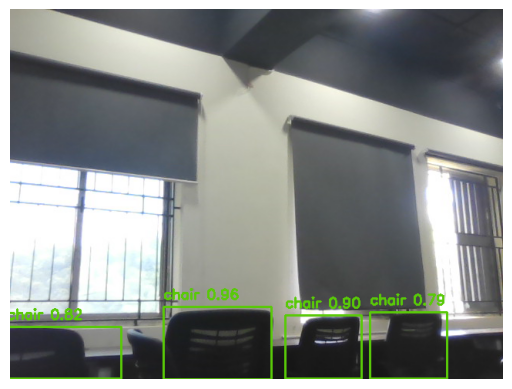

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
net = cv2.dnn.readNet(r"C:\Users\admin\Downloads\yolov4.weights", r"C:\Users\admin\Documents\yolov4.cfg")
with open(r"C:\Users\admin\Documents\coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
cap = cv2.VideoCapture(0)
layer_names = net.getLayerNames()
outs = net.getUnconnectedOutLayers()
if len(outs.shape) == 1:
    output_layers = [layer_names[i - 1] for i in outs]
else:
    output_layers = [layer_names[i[0] - 1] for i in outs]
colors = np.random.uniform(0, 255, size=(len(classes), 3))
plt.ion()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break
    height, width, channels = frame.shape
    blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    class_ids, confidences, boxes = [], [], []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    if len(indexes) > 0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = classes[class_ids[i]]
            confidence = confidences[i]
            color = colors[class_ids[i]]
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    clear_output(wait=True)  
    plt.imshow(frame_rgb)
    plt.axis('off')
    display(plt.gcf())  
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
plt.close()